In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
data = pd.read_csv("Dataset .csv")

In [3]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


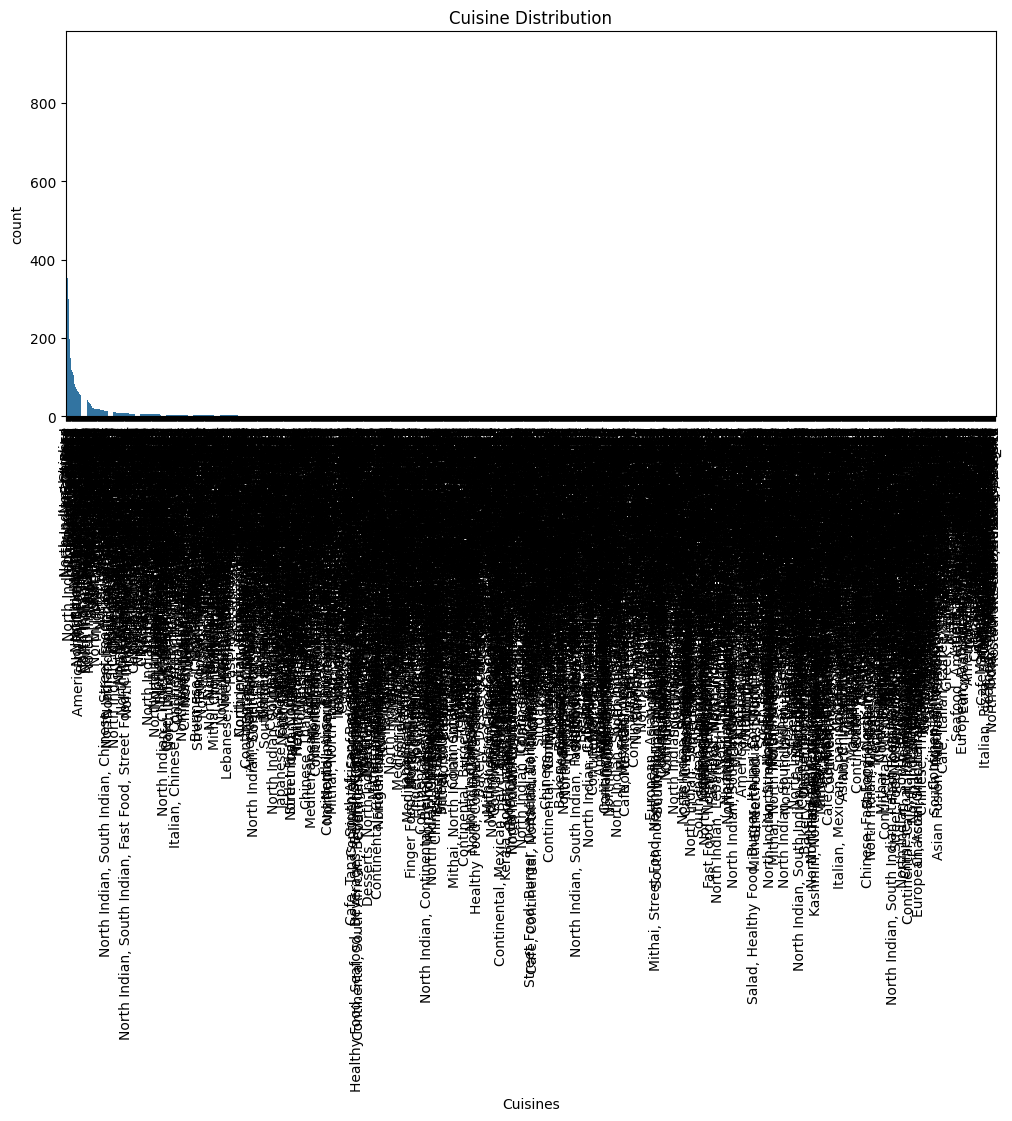

In [10]:
# Cuisine Distribution
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Cuisines', order=df['Cuisines'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Cuisine Distribution")
plt.show()

In [11]:
# Outlier Detection and Treatment
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

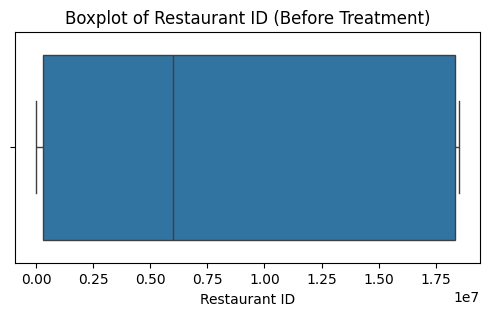

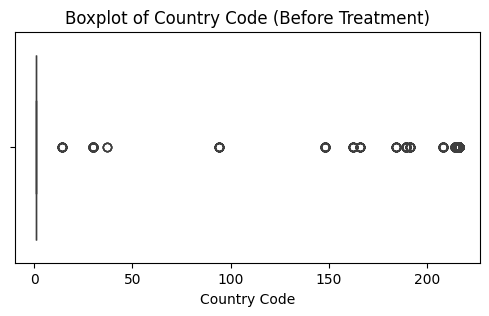

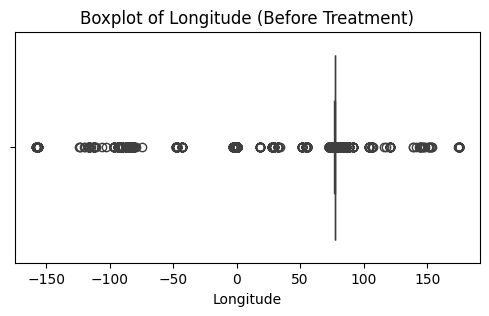

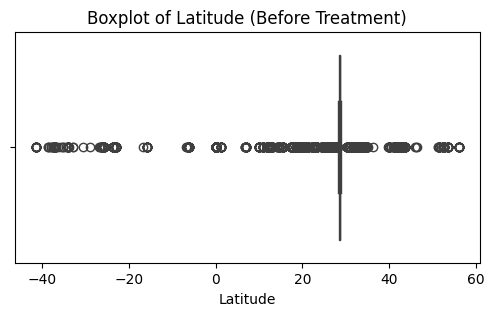

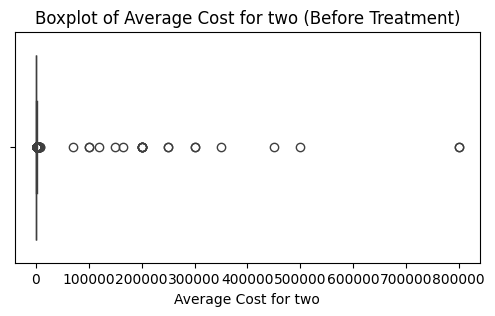

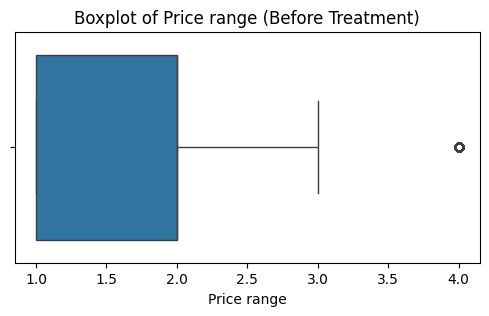

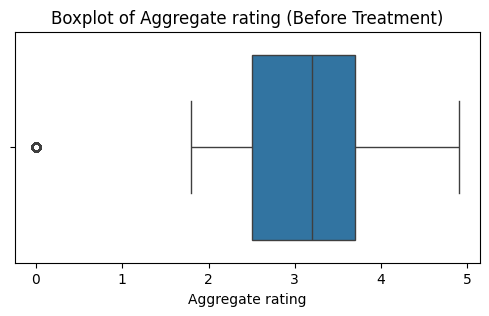

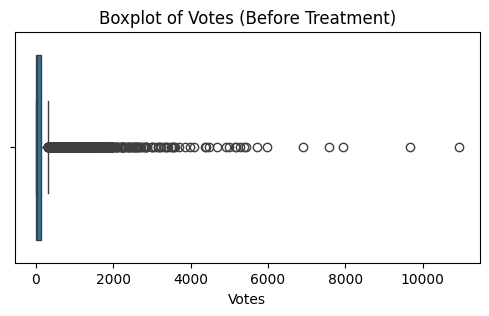

In [12]:
# Boxplots before treatment
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Before Treatment)")
    plt.show()

In [13]:
# Cap outliers
for col in numeric_cols:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = np.clip(df[col], q1, q99)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)


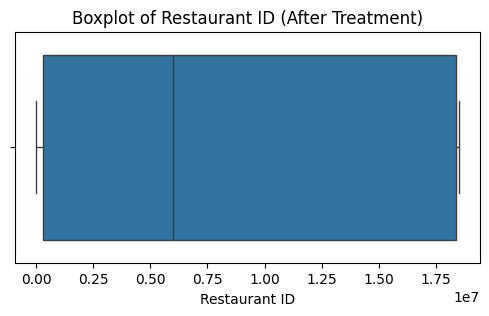

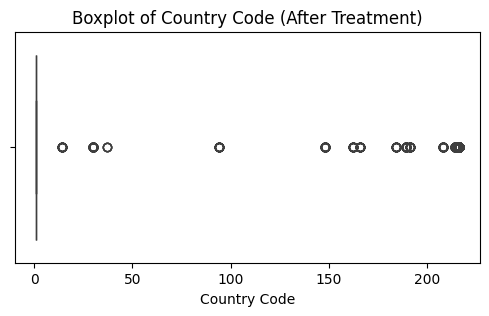

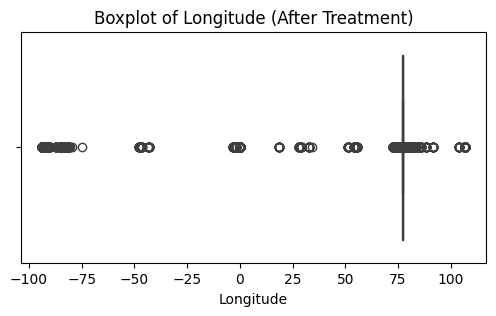

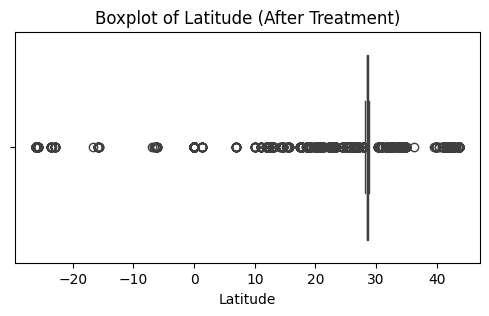

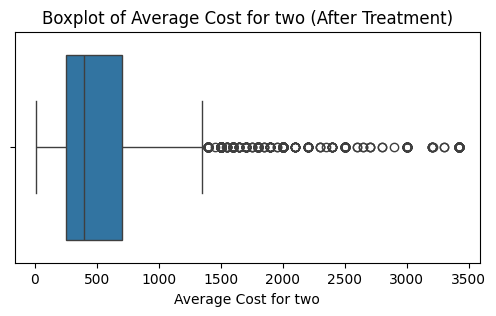

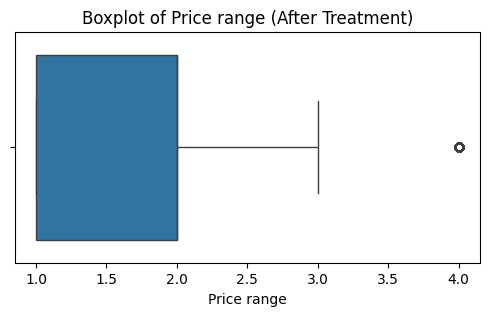

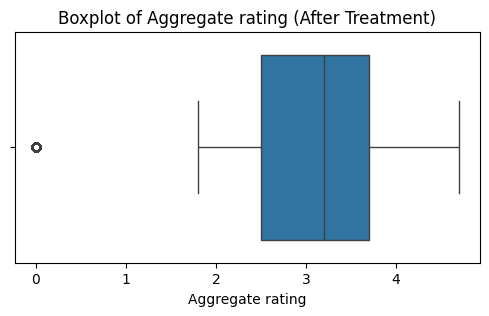

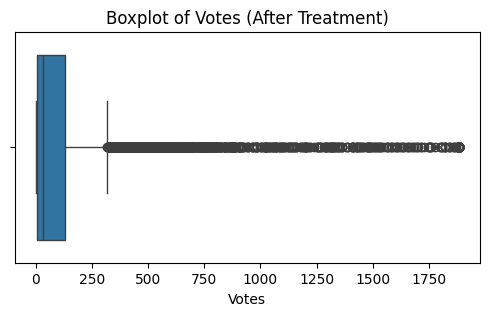

In [14]:
# Boxplots after treatment
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (After Treatment)")
    plt.show()

In [15]:
# Encode Target
le = LabelEncoder()
df['Cuisines_encoded'] = le.fit_transform(df['Cuisines'])

In [16]:
# Checking Class Distribution and Filter
class_counts = df['Cuisines'].value_counts()
print(class_counts)

Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish, Desserts      1
Restaurant Cafe, Desserts               1
Name: count, Length: 1825, dtype: int64


In [17]:
# Remove cuisines with < 2 samples
valid_cuisines = class_counts[class_counts >= 2].index
df_filtered = df[df['Cuisines'].isin(valid_cuisines)]

In [18]:
# Feature and Target Setup
X = df_filtered.drop(['Cuisines', 'Cuisines_encoded', 'Restaurant Name'], axis=1, errors='ignore')
y = df_filtered['Cuisines_encoded']

In [19]:
# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])

In [20]:
# Feature Selection using f_classif
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k='all')

In [21]:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

                 Feature      Score
1           Country Code  34.443736
6              Longitude  17.294573
14           Price range  17.286145
8   Average Cost for two  14.964816
9               Currency   9.605476
18                 Votes   8.630271
10     Has Table booking   8.454016
12     Is delivering now   5.600274
11   Has Online delivery   4.350727
15      Aggregate rating   4.270576
7               Latitude   3.901420
2                   City   2.759184
16          Rating color   2.720847
17           Rating text   2.650927
0          Restaurant ID   2.618669
3                Address   1.742751
4               Locality   1.383165
5       Locality Verbose   1.358740
13  Switch to order menu        NaN


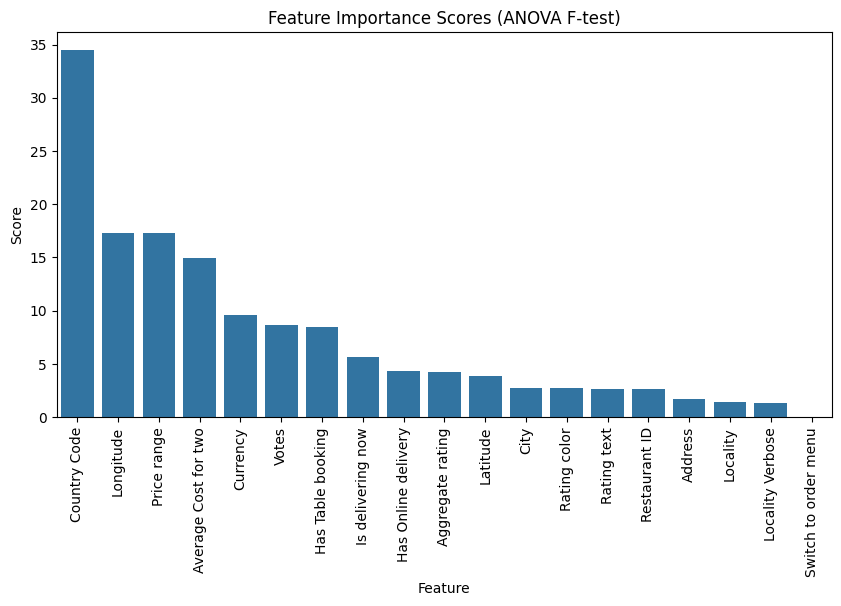

In [22]:
# Bar plot of feature scores
plt.figure(figsize=(10,5))
sns.barplot(x=feature_scores['Feature'], y=feature_scores['Score'])
plt.xticks(rotation=90)
plt.title("Feature Importance Scores (ANOVA F-test)")
plt.show()

In [23]:
#Standardizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
# Define and Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}
results = []

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    results.append([name, acc, prec, rec, f1])

    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds, zero_division=0))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           6       0.07      0.17      0.10         6
          12       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         3
          35       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         4
          55       0.00      0.00      0.00         2
          58       0.50      0.62      0.55        13
          69       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1
          98       0.20      0.50      0.29         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         3
          35       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         4
          55       0.00      0.00      0.00         2
          58       0.31      0.62      0.41        13
          69       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         2
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Model Comparison Table
comparison_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("\n Model Comparison")
print(comparison_df)


 Model Comparison
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.153660   0.084869  0.153660  0.088378
1        Random Forest  0.156080   0.119919  0.156080  0.126418
2                  SVM  0.144586   0.063416  0.144586  0.068571
3                  KNN  0.091954   0.079034  0.091954  0.078728


In [28]:
# Select Best Model
best_model_name = comparison_df.sort_values(by='F1 Score', ascending=False).iloc[0]['Model']
print(f"\n✅ Best model selected: {best_model_name}")



✅ Best model selected: Random Forest


In [29]:
# Get the trained best model
best_model = models[best_model_name]


In [30]:
# Use Best Model
y_best_pred = best_model.predict(X_test)


In [31]:
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_best_pred, zero_division=0))


Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         3
          35       0.00      0.00      0.00         1
          54       0.00      0.00      0.00         4
          55       0.00      0.00      0.00         2
          58       0.31      0.62      0.41        13
          69       0.00      0.00      0.00         1
          78       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1
          98       0.00      0.00      0.0

In [36]:
# Get top N most frequent cuisines
N = 10

top_classes = df['Cuisines'].value_counts().index[:N]
top_class_indices = [le.transform([cls])[0] for cls in top_classes]


In [37]:
# Filter test data for only top classes
mask = y_test.isin(top_class_indices)
y_test_top = y_test[mask]
y_pred_top = pd.Series(y_best_pred, index=y_test.index)[mask]



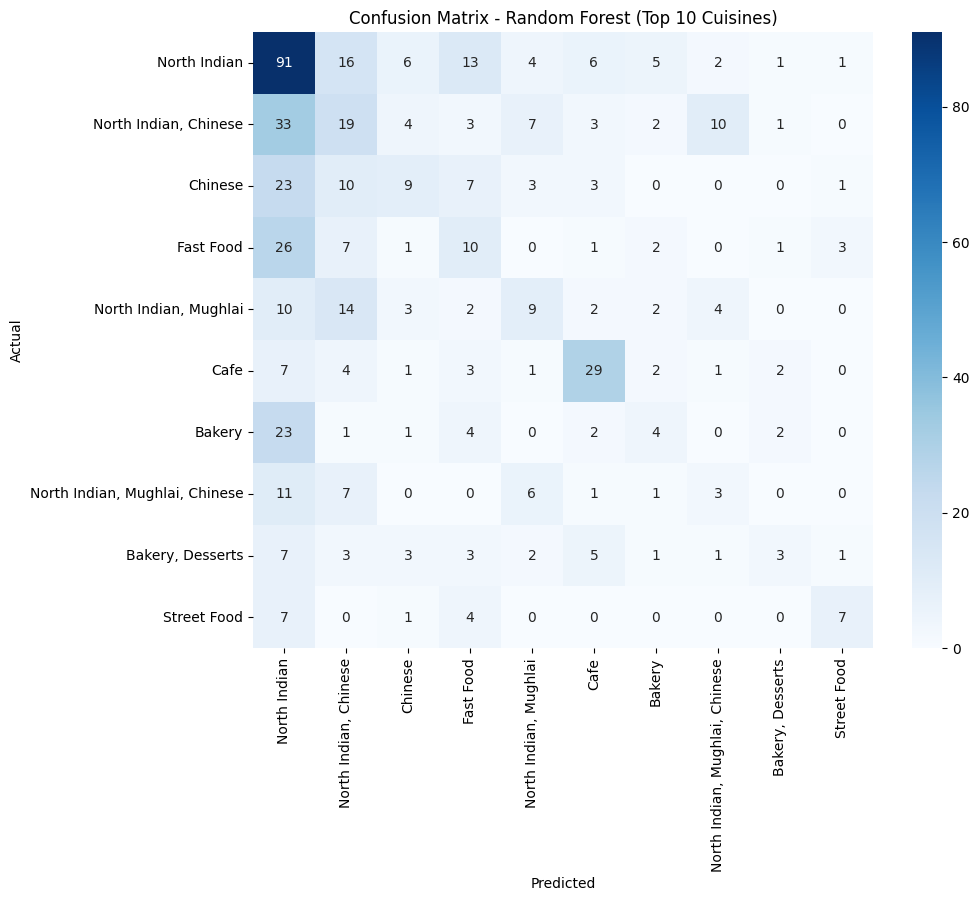

In [38]:
# confusion matrix for these classes
cm = confusion_matrix(y_test_top, y_pred_top, labels=top_class_indices)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_classes, yticklabels=top_classes)
plt.title(f"Confusion Matrix - {best_model_name} (Top {N} Cuisines)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
 # Simple Content-Based Recommendation
user_preferred_cuisine = "North Indian"

recommended_restaurants = df[df['Cuisines'] == user_preferred_cuisine]['Restaurant Name'].unique()
print(f"\nRestaurants recommended for cuisine '{user_preferred_cuisine}':")
print(recommended_restaurants[:10])



Restaurants recommended for cuisine 'North Indian':
['Time2Eat - Mama Chicken' 'Eat On' 'Charming Chicken'
 'Bubby Fish & Chicken Corner' 'Brothers Dhaba'
 "Brothers' Amritsari Dhaba" 'Kesar Da Dhabha' 'Beera Chicken Corner'
 'Surjit Food Plaza' 'Naivedya']
